In [1]:
from model import CRNN
from Dataset.CropDataset import CropDataset, GeneratedDataset, CommonDataset
from transforms import get_transforms
import torch
import string
import matplotlib.pyplot as plt
from predictor import Predictor


device=torch.device('cpu:0')

dataset = CommonDataset(transforms=None, cached=False)

pred = Predictor()

nb 4134
neg 750
gen 4994


In [2]:
len(dataset.Train)

6900

In [3]:
ds = dataset.Train[91]
ds1 = dataset.Train[831]
ds[0].shape

(48, 144, 3)

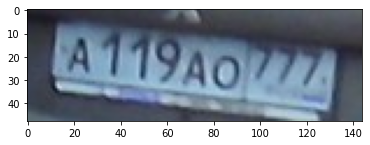

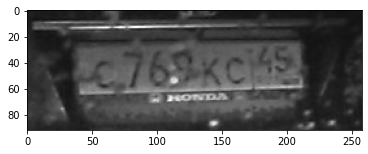

In [4]:
plt.imshow(ds[0], cmap='gray')
plt.show()
plt.clf()
plt.imshow(ds1[0], cmap='gray')

In [5]:
result = pred.predict([ds[0], ds1[0]])
print(result)

(1, 32, 80)
(1, 32, 80)
['A119AO', 'C769KC']
